# Introduction of the Dataset and Analysis Plan

### Structure of the dataset

We have a couple of options to choose from with datasets:
    - alldata.csv
    - 15 different states csv's
    
Ideally, we would like to see all of them in one because our plan is to answer these questions:

- How many job ads fit the Data Analyst skillset?
- Which are the top employers by number of job ads?
- What's the number of job ads which has salary information vs do not have salary information? 


We concluded 
- that we cannot define who was hired because we don't know the end result of the hiring process
- that we might miss some data because the same tasks, skills, positions are expressed differently


We will look at the datasets' statistics, datatypes, missing and duplicated values as well as visually assess it to define cleaning steps.


**Columns**

position: title of the position

company: name of the companies

description: job description

reviews: reviews of job ads

location: location of the job ads


## Assessment

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [438]:
# read csv
df = pd.read_csv('alldata.csv')

In [393]:
# assess shape
df.shape

(6964, 5)

In [394]:
# assess first 20 rows 
df.head(20)

position  \
0                                                          Development Director   
1   An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist   
2                                                                Data Scientist   
3                                                                  Data Analyst   
4                Assistant Professor -TT - Signal Processing & Machine Learning   
5                                                   Manager of Data Engineering   
6                                  Product Specialist - Periscope, New Ventures   
7            Junior to Mid-level Engineer, Geologist or Environmental Scientist   
8                                                 Analyst - CIB Credit Research   
9       Senior Associate - Cognitive Data Scientist Natural Language Processing   
10                                                 STATISTICAL FORECAST ANALYST   
11                                                    Health Scientist III-CPTS   
12                                             Senior Associate, Data Scientist   
13                                                 Assistant Scientist (AR) SOM   
14                    Business Intelligence Data Science Analyst - Supply Chain   
15                                                               Data Scientist   
16                       Senior Structural Engineer-Transmission & Distribution   
17                                        Senior Mobile Developer (iOS/Android)   
18                                                               Data Scientist   
19                                                               Data Scientist   

                company  \
0               ALS TDI   
1    The Hexagon Lavish   
2        Xpert Staffing   
3        Operation HOPE   
4      Emory University   
5    McKinsey & Company   
6    McKinsey & Company   
7                  Wood   
8              SunTrust   
9                  KPMG   
10       The Home Depot   
11  Chenega Corporation   
12                 KPMG   
13     Emory University   
14        Newell Brands   
15             Cotiviti   
16    Burns & McDonnell   
17           Perficient   
18          Relus Cloud   
19       Inspire Brands   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [395]:
# assess last 20 rows 
df.tail(20)

position  \
6944                  Staff Data Scientist, Search/Online Grocery   
6945                Machine Learning Specialist, Trust and Safety   
6946                                           Research Scientist   
6947                           Applied Machine Learning Scientist   
6948                                                    Scientist   
6949  Systems software Performance Data Scientist Sunnyvale/China   
6950                             Applied Scientist - Alexa Engine   
6951                                    Lead Data Scientist - NLP   
6952            Image processing Deep learning Research Scientist   
6953                     Machine Learning Scientist, Amazon Alexa   
6954                      Global Mobility Specialist, Immigration   
6955                                                Data Engineer   
6956                                    Manager, Machine Learning   
6957                                Lead Data Scientist - Haskell   
6958                             Senior Data Scientist (GEC11902)   
6959                    Data Developer / Machine Learning Analyst   
6960                                                  Scientist I   
6961                                             Intern Scientist   
6962                              Senior Data & Applied Scientist   
6963                      Principal Data Scientist, Deep Learning   

                               company  \
6944                 Walmart eCommerce   
6945                            Google   
6946                        Amazon.com   
6947                        Amazon.com   
6948                         Microsoft   
6949                           Alibaba   
6950                        Amazon.com   
6951                            TARGET   
6952                    Whiterabbit.ai   
6953                        Amazon.com   
6954                            Google   
6955                        Amazon.com   
6956                        Amazon.com   
6957                            TARGET   
6958                           Walmart   
6959                            NetApp   
6960  Pharmacyclics, an Abbvie Company   
6961                          Oath Inc   
6962                         Microsoft   
6963                           Comcast   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [396]:
# assess dtypes of columns
df.dtypes

position        object
company         object
description     object
reviews        float64
location        object
dtype: object

In [397]:
# assess statistics of the dataset
df.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [398]:
# assess column non-null values set to see which column has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [399]:
# assess df's null values
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [400]:
# assess df's duplicated values
sum(df.duplicated())

10

In [401]:
# assess frequency and list of values in different columns
df['position'].value_counts()

Data Scientist                                                                 351
Senior Data Scientist                                                           96
Research Analyst                                                                64
Data Engineer                                                                   60
Machine Learning Engineer                                                       56
                                                                              ... 
Principal Data Scientist - Prime Video Personalization                           1
Data Scientist - CONSULTANT Level - ORLANDO FLORIDA - We will help Relocate      1
Sourcer                                                                          1
Knowledge Engineer - French - Alexa                                              1
Research Scientist II - Statistical Genetics                                     1
Name: position, Length: 5242, dtype: int64

In [402]:
# assess frequency and list of values in different columns
df['company'].value_counts()

Amazon.com                    358
Ball Aerospace                187
Microsoft                     137
Google                        134
NYU Langone Health             77
                             ... 
Solving IT                      1
Qulab Inc.                      1
SHIELDS for Families, Inc.      1
LabKey Software                 1
PlaceIQ                         1
Name: company, Length: 2213, dtype: int64

In [403]:
# assess frequency and list of values in different columns
df['location'].value_counts()

Seattle, WA                563
New York, NY               508
Cambridge, MA              487
Boston, MA                 454
San Francisco, CA          425
                          ... 
Kentfield, CA 94904          1
San Francisco, CA 94109      1
Atlanta, GA 30339            1
Lynbrook, NY                 1
Los Angeles, CA 90006        1
Name: location, Length: 382, dtype: int64

## Outcome of Assesment



### Cleaning steps

**Description column: Karina/Lilla**

- Scrape description column for Excel, R, Python, Tableau, Machine Learning, MySQL, SQL, A/B Tests, Data Mining, Data visualisation, (data visualization), Data Cleansing, Data Cleaning, Statistical modeling, Statistical Analysis

- create a column which validates if they are present in the description with a function and returns a True/False value in the column

- Scrape description column for levels: Entry-level, Junior/Associate,  Internship/Intern 

- create a column which validates if one is present in the description with a function and returns a True/False value in the column

- Before dropping the rows we don’t need, we check the position value

- Scrape for: dollars, $, salary 

- create a column which validates if one is present in the description with a function and returns a True/False value in the column

- Check if it's valid



**Position column: Karina/Lilla**

- Relocate seniority level to a different column

- Revisit when we have both new columns from description and position


**Review column: Neil**

- Drop it completely


**Location column: Neil**

- Check if there are typos
- Check how many zip codes are missing and make a decision to fill them in or not

In [439]:
# read the first few rows again
df.head()

position  \
0                                                         Development Director   
1  An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist   
2                                                               Data Scientist   
3                                                                 Data Analyst   
4               Assistant Professor -TT - Signal Processing & Machine Learning   

              company  \
0             ALS TDI   
1  The Hexagon Lavish   
2      Xpert Staffing   
3      Operation HOPE   
4    Emory University   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [441]:
# drop review column
df = df.drop(['reviews'], axis=1)

In [442]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   position     6953 non-null   object
 1   company      6953 non-null   object
 2   description  6953 non-null   object
 3   location     6953 non-null   object
dtypes: object(4)
memory usage: 217.8+ KB


In [443]:
# define list of skills of a Data Analyst
lst_skills = ['Excel', 'R', 'Python', 'Tableau', 'Machine Learning', 'MySQL', 
              'SQL', 'A/B Tests', 'A/B Testing', 'Data Mining', 'Data visualisation', 'Data Visualization',
              'Data Cleansing', 'Data Cleaning', 'Statistical modeling', 'Statistical Analysis']

In [444]:
# create new column with boolean values
df['description_is_data_analytics'] = df['description'].str.contains(" | ".join(lst_skills))

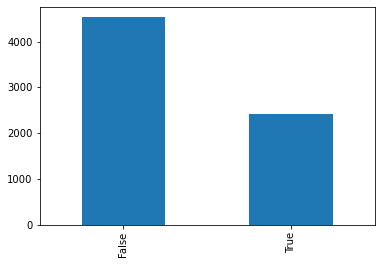

In [445]:
# plot outcome of new column
ax = df['description_is_data_analytics'].value_counts().plot(kind="bar");
plt.xlabel('Salary Information', fontsize=12)
plt.ylabel('Number of job ads', fontsize=12)
plt.xticks(rotation=15)
plt.title('Proportion of Salaries included in the Job Description', fontsize=16)
ax.set_xticklabels(['Salary excluded', 'Salary included']);

In [446]:
# define list of salary keywords
lst_salary = ['Salary', 'salary']

In [447]:
# create new column with boolean values
df['description_has_salary'] = df['description'].str.contains(" | ".join(lst_skills))

In [448]:
#test
df.head()

position  \
0                                                         Development Director   
1  An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist   
2                                                               Data Scientist   
3                                                                 Data Analyst   
4               Assistant Professor -TT - Signal Processing & Machine Learning   

              company  \
0             ALS TDI   
1  The Hexagon Lavish   
2      Xpert Staffing   
3      Operation HOPE   
4    Emory University   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

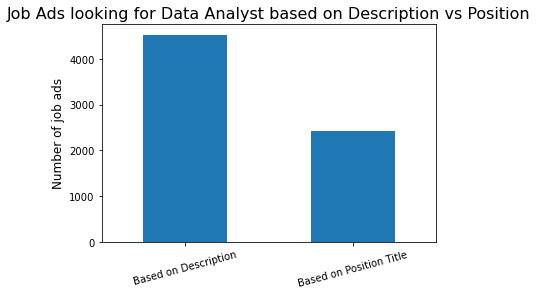

In [450]:
# plot outcome of new column
ax = df['description_is_data_analytics'].value_counts().plot(kind="bar");
plt.ylabel('Number of job ads', fontsize=12)
plt.xticks(rotation=15)
plt.title('Job Ads looking for Data Analyst based on Description vs Position', fontsize=16)
ax.set_xticklabels(['Based on Description', 'Based on Position Title']);

In [452]:
# count most frequent values of location column
df['location'].value_counts()

Seattle, WA                563
New York, NY               508
Cambridge, MA              487
Boston, MA                 454
San Francisco, CA          425
                          ... 
Kentfield, CA 94904          1
San Francisco, CA 94109      1
Atlanta, GA 30339            1
Lynbrook, NY                 1
Los Angeles, CA 90006        1
Name: location, Length: 382, dtype: int64

In [451]:
# addign new variable to top locations
top_locations = df['location'].value_counts()
top_locations

Seattle, WA                563
New York, NY               508
Cambridge, MA              487
Boston, MA                 454
San Francisco, CA          425
                          ... 
Kentfield, CA 94904          1
San Francisco, CA 94109      1
Atlanta, GA 30339            1
Lynbrook, NY                 1
Los Angeles, CA 90006        1
Name: location, Length: 382, dtype: int64

In [418]:
# define top 5 locations
top_locations[:5]

Seattle, WA          563
New York, NY         508
Cambridge, MA        487
Boston, MA           454
San Francisco, CA    425
Name: location, dtype: int64

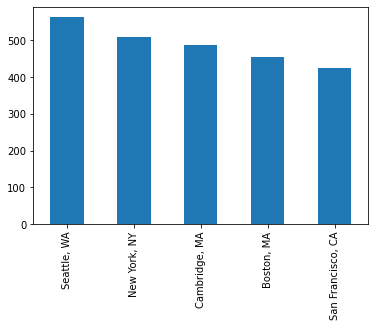

In [453]:
# plot top 5 locations
top_locations[:5].plot(kind="bar");

In [454]:
# count most frequent values of location column
# addign new variable to top locations

top_companies = df['company'].value_counts()
top_companies

Amazon.com                    358
Ball Aerospace                187
Microsoft                     137
Google                        134
NYU Langone Health             77
                             ... 
Solving IT                      1
Qulab Inc.                      1
SHIELDS for Families, Inc.      1
LabKey Software                 1
PlaceIQ                         1
Name: company, Length: 2213, dtype: int64

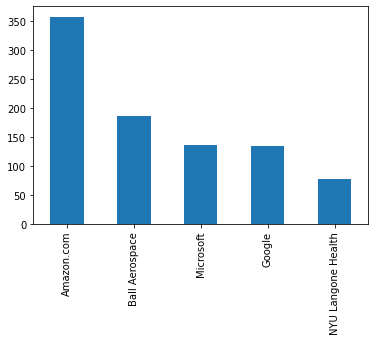

In [455]:
# plot top 5 locations
top_companies[:5].plot(kind="bar");

In [422]:
# identidy rows for seniority level as 'Intern', 'Junior', 'Associated', 'Internship', 'Entry-level'
lst_level = ['Intern', 'Junior', 'Associated', 'Internship', 'Entry-level', 'Entry level']
df['description_level'] = df['description'].str.contains(" | ".join(lst_level))

In [423]:
df.head()

position  \
0                                                         Development Director   
1  An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist   
2                                                               Data Scientist   
3                                                                 Data Analyst   
4               Assistant Professor -TT - Signal Processing & Machine Learning   

              company  \
0             ALS TDI   
1  The Hexagon Lavish   
2      Xpert Staffing   
3      Operation HOPE   
4    Emory University   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [456]:
# filter by top locations for Data Analyst positions
df.groupby('location', sort=False)['position'].apply(
     lambda df: df.str.contains("Data Analyst").sum()
 ).nlargest(10)

location
New York, NY           21
Cambridge, MA          11
San Francisco, CA      11
Chicago, IL             7
Seattle, WA             7
Austin, TX              5
Boston, MA              5
Washington, DC          5
Manhattan, NY           5
New York, NY 10001      4
Name: position, dtype: int64